In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
#Setting default sizes and color for plots
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(15,4)

# Loading DF

In [2]:
#Loading Chicago Crime dataset
fpath = "/Users/echo/Documents/CodingDojo/Data_Visualization/Week 2/Project-4-Part-1/Data/Chicago/Crimes_-_2001_to_Present.csv"
df = pd.read_csv(fpath)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11243268,JB167760,01/01/2017 12:01:00 AM,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN
3,1896258,G749215,12/15/2001 02:00:00 AM,011XX N STATE ST,0460,BATTERY,SIMPLE,STREET,False,False,...,NaN,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [3]:
#Looking at dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7883251 entries, 0 to 7883250
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [4]:
#Checking a row's date format
df.loc[0, "Date"]

'09/01/2018 12:01:00 AM'

In [5]:
#Dropping columns we dont need in this analysis
drop_cols = ["Date", "ID", "Case Number", "Block", "Description", 
             "Location Description", "Arrest", "Domestic",
             "Beat", "Ward", "Community Area", "FBI Code", "X Coordinate",
            "Y Coordinate", "Updated On", "Latitude", "Longitude", "Location", "IUCR", "District"]
df_year = df.drop(columns=drop_cols).copy()
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7883251 entries, 0 to 7883250
Data columns (total 2 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Primary Type  object
 1   Year          int64 
dtypes: int64(1), object(1)
memory usage: 120.3+ MB


### Cleaning `Primary Type` 

In [6]:
#Get count of each type of crime
df_year["Primary Type"].value_counts()

THEFT                                1663593
BATTERY                              1439899
CRIMINAL DAMAGE                       898725
NARCOTICS                             749395
ASSAULT                               515894
OTHER OFFENSE                         489321
BURGLARY                              427055
MOTOR VEHICLE THEFT                   386191
DECEPTIVE PRACTICE                    351561
ROBBERY                               296310
CRIMINAL TRESPASS                     215951
WEAPONS VIOLATION                     109848
PROSTITUTION                           69910
OFFENSE INVOLVING CHILDREN             56474
PUBLIC PEACE VIOLATION                 52660
SEX OFFENSE                            31309
CRIM SEXUAL ASSAULT                    27583
INTERFERENCE WITH PUBLIC OFFICER       18579
LIQUOR LAW VIOLATION                   14972
GAMBLING                               14623
ARSON                                  13443
HOMICIDE                               12816
CRIMINAL S

In [36]:
#Combining inconsistent values
replace_dict = {"CRIM SEXUAL ASSAULT":"CRIMINAL SEXUAL ASSAULT", 
                "NON-CRIMINAL \(SUBJECT SPECIFIED\)":"NON-CRIMINAL",
             "NON - CRIMINAL":"NON-CRIMINAL"}
df_year["Primary Type"] = df_year["Primary Type"].replace(replace_dict, regex=True)

In [37]:
#Ensuring CRIM SEXUAL ASSAULT and CRIMINAL SEXUAL ASSAULT have been combined
df_year["Primary Type"].value_counts()

THEFT                                1663593
BATTERY                              1439899
CRIMINAL DAMAGE                       898725
NARCOTICS                             749395
ASSAULT                               515894
OTHER OFFENSE                         489321
BURGLARY                              427055
MOTOR VEHICLE THEFT                   386191
DECEPTIVE PRACTICE                    351561
ROBBERY                               296310
CRIMINAL TRESPASS                     215951
WEAPONS VIOLATION                     109848
PROSTITUTION                           69910
OFFENSE INVOLVING CHILDREN             56474
PUBLIC PEACE VIOLATION                 52660
CRIMINAL SEXUAL ASSAULT                34999
SEX OFFENSE                            31309
INTERFERENCE WITH PUBLIC OFFICER       18579
LIQUOR LAW VIOLATION                   14972
GAMBLING                               14623
ARSON                                  13443
HOMICIDE                               12816
KIDNAPPING

# Crimes Across the Years

In [39]:
#Sorting Types of Crime with year
df_year = df_year.sort_index()
df_year.head()

,Primary Type,Year
0,THEFT,2018
1,DECEPTIVE PRACTICE,2016
2,SEX OFFENSE,2017
3,BATTERY,2001
4,DECEPTIVE PRACTICE,2015


In [40]:
#Grouping Year and Type of Crime while sorting Crimes #s
crimes_by_year = df_year.groupby("Year")["Primary Type"].value_counts().sort_index()
crimes_by_year

Year  Primary Type                     
2001  ARSON                                 1011
      ASSAULT                              31384
      BATTERY                              93461
      BURGLARY                             26014
      CONCEALED CARRY LICENSE VIOLATION        1
                                           ...  
2023  ROBBERY                               6634
      SEX OFFENSE                            869
      STALKING                               322
      THEFT                                36599
      WEAPONS VIOLATION                     5942
Name: Primary Type, Length: 691, dtype: int64

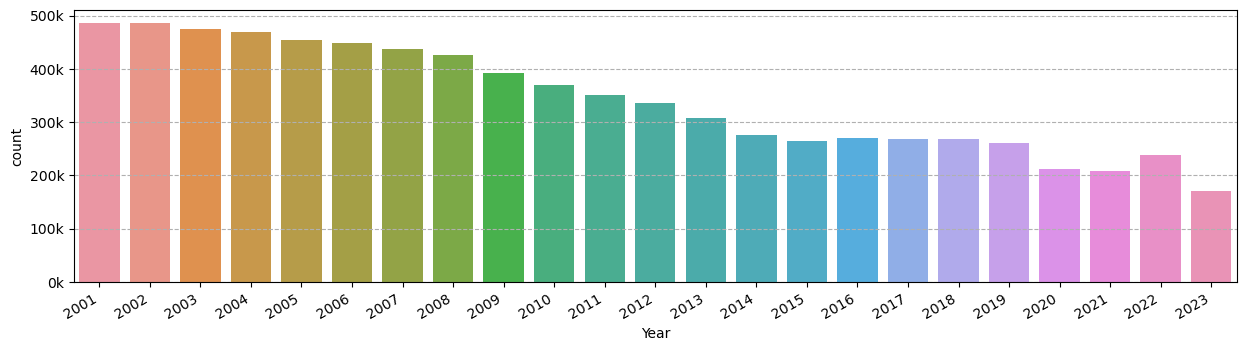

In [41]:
# Define a function to format the y-axis labels
def millions_formatter(x, pos):
    return f'{int(x/1000)}k'
## Visualizing crime numbers for each year
ax = sns.countplot(df_year, x='Year')
#Setting y-axis format to K's
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
#Putting y axis grid
plt.grid(True, axis='y', linestyle='--', alpha=1.0)  # Add a grid on the y-axis
fig = ax.get_figure()
fig.autofmt_xdate()

## Is the total number of crimes increasing or decreasing across the years?
    
* From our chart above, we can see the number of crimes is decreasing.

In [42]:
## convert value_counts to new column and dataframe and reset_index()
plot_df = crimes_by_year.to_frame('# of Crimes').reset_index()
plot_df

,Year,Primary Type,# of Crimes
0,2001,ARSON,1011
1,2001,ASSAULT,31384
2,2001,BATTERY,93461
3,2001,BURGLARY,26014
4,2001,CONCEALED CARRY LICENSE VIOLATION,1
...,...,...,...
686,2023,ROBBERY,6634
687,2023,SEX OFFENSE,869
688,2023,STALKING,322
689,2023,THEFT,36599


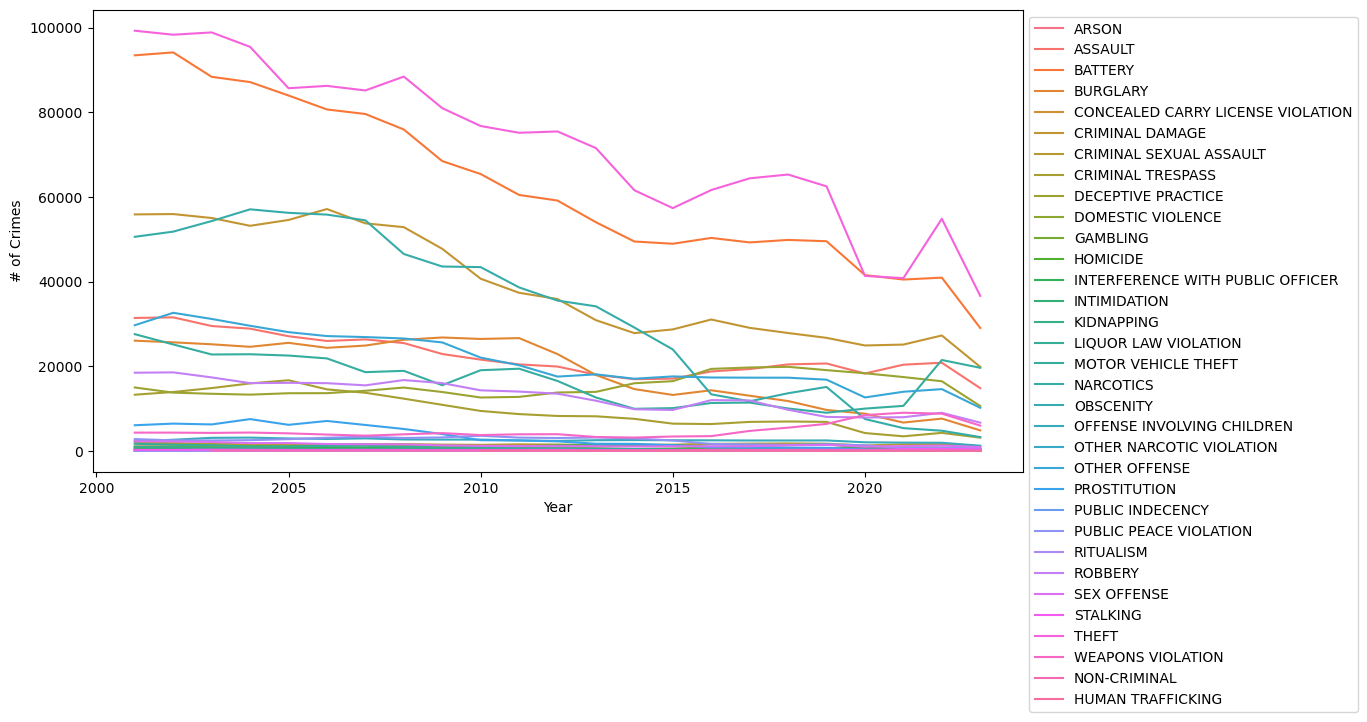

In [43]:
#Plotting each type of crime by year
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(plot_df, x='Year', y="# of Crimes",markers=True,
                  hue='Primary Type',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);

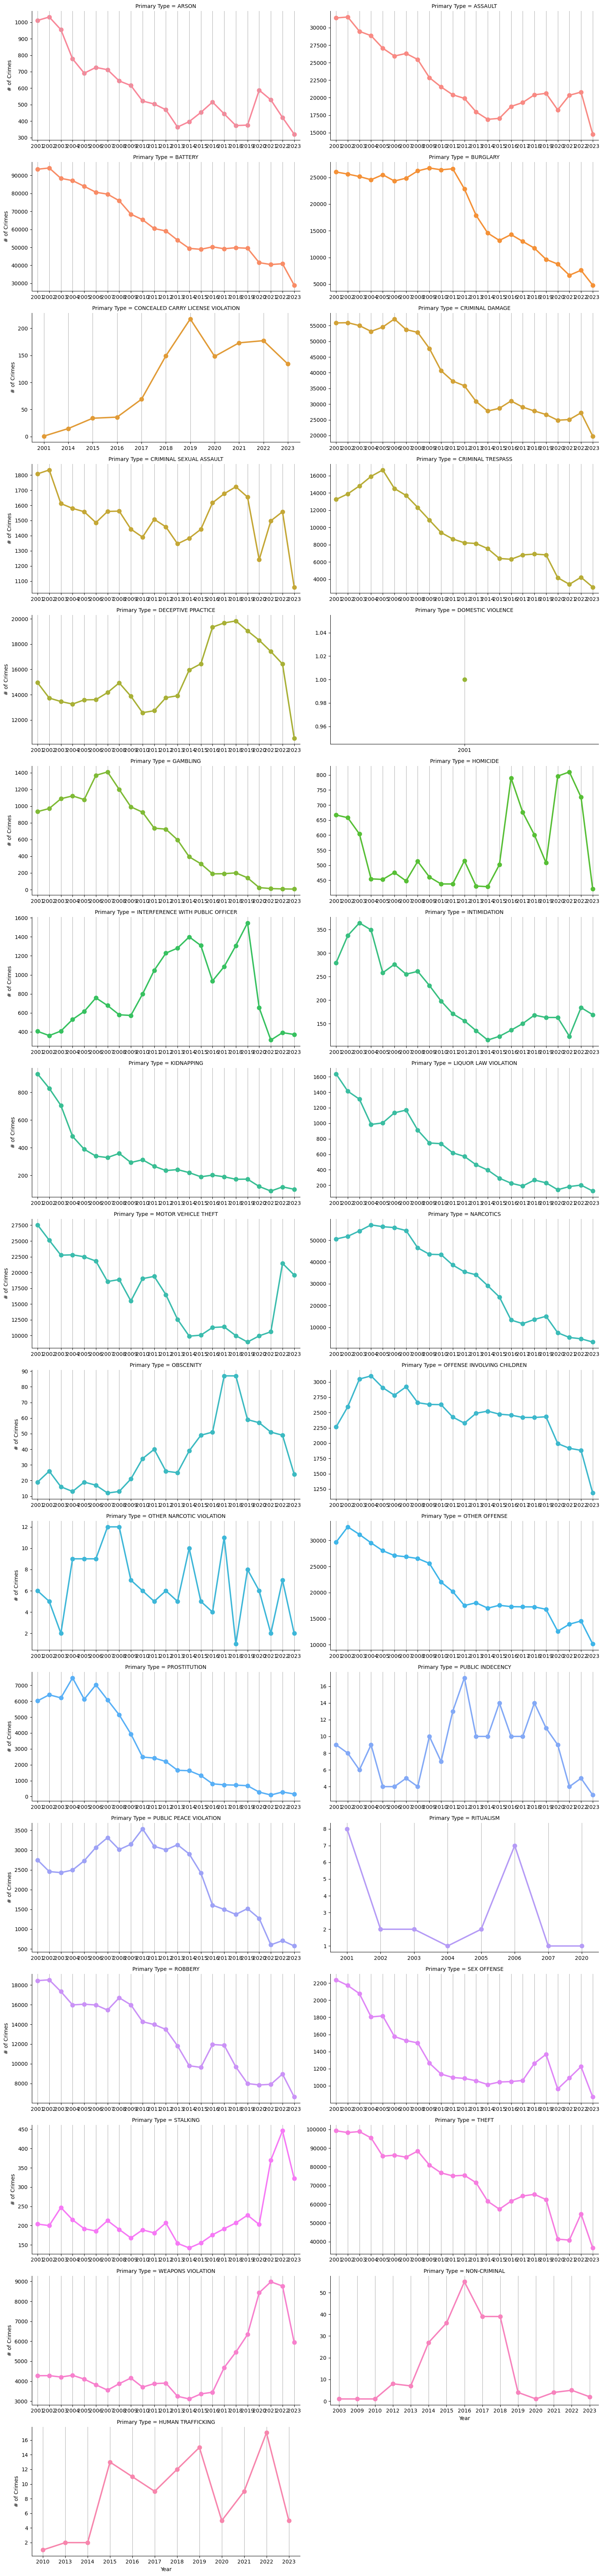

In [44]:
#catplot, which can produce many different kinds of figures
# specify col='Primary Type' to produce a separate subplot for each category in the provided column name.
#col_wrap=2 for two columns
g = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

## Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

Crimes Increasing:
* Criminal 
* Sexual Assault
* Homicide, Stalking
* Weapons Violation increasing

# Comparing Police Districts

## Which district has the most crimes? Which has the least?

Most: District 8

Least: District 21

In [45]:
#Dropping columns we dont need
drop_cols = ["Date", "ID", "Case Number", "Block", "Description", 
             "Location Description", "Arrest", "Domestic",
             "Beat", "Ward", "Community Area", "FBI Code", "X Coordinate",
            "Y Coordinate", "Updated On", "Latitude", "Longitude", "Location", "IUCR", "Year"]
df_districts = df.drop(columns=drop_cols).copy()
df_districts

,Primary Type,District
datetime,,
2018-09-01 12:01:00,THEFT,6.0
2016-05-01 12:25:00,DECEPTIVE PRACTICE,8.0
2017-01-01 12:01:00,SEX OFFENSE,19.0
2001-12-15 02:00:00,BATTERY,18.0
2015-02-02 10:00:00,DECEPTIVE PRACTICE,8.0
...,...,...
2023-06-21 08:00:00,CRIMINAL DAMAGE,14.0
2023-05-13 12:00:00,DECEPTIVE PRACTICE,12.0
2023-06-24 01:29:00,CRIMINAL TRESPASS,24.0


In [46]:
#Looking at datatypes
df_districts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7883251 entries, 2018-09-01 12:01:00 to 2023-06-28 06:00:00
Data columns (total 2 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Primary Type  object 
 1   District      float64
dtypes: float64(1), object(1)
memory usage: 180.4+ MB


In [47]:
#sorting crime count by district
plot_df = df_districts.groupby("District")["Primary Type"].value_counts().sort_index()
plot_df

District  Primary Type                     
1.0       ARSON                                  125
          ASSAULT                              15130
          BATTERY                              33876
          BURGLARY                              5340
          CONCEALED CARRY LICENSE VIOLATION       21
                                               ...  
31.0      PUBLIC PEACE VIOLATION                   1
          ROBBERY                                  2
          SEX OFFENSE                              4
          STALKING                                 1
          THEFT                                   46
Name: Primary Type, Length: 755, dtype: int64

In [48]:
#convert to dataframe and reset_index()
plot_df = plot_df.to_frame('# of Crimes').reset_index()
plot_df

,District,Primary Type,# of Crimes
0,1.0,ARSON,125
1,1.0,ASSAULT,15130
2,1.0,BATTERY,33876
3,1.0,BURGLARY,5340
4,1.0,CONCEALED CARRY LICENSE VIOLATION,21
...,...,...,...
750,31.0,PUBLIC PEACE VIOLATION,1
751,31.0,ROBBERY,2
752,31.0,SEX OFFENSE,4
753,31.0,STALKING,1


In [49]:
#Grouping District by Number of Crimes
district_sums = plot_df.groupby("District")["# of Crimes"].sum()
district_sums

District
1.0     320053
2.0     373745
3.0     399774
4.0     447532
5.0     348966
6.0     461037
7.0     454535
8.0     529382
9.0     384801
10.0    339694
11.0    505263
12.0    391448
14.0    304700
15.0    336922
16.0    264138
17.0    227475
18.0    354213
19.0    354685
20.0    139665
21.0         4
22.0    258223
24.0    238577
25.0    448125
31.0       247
Name: # of Crimes, dtype: int64

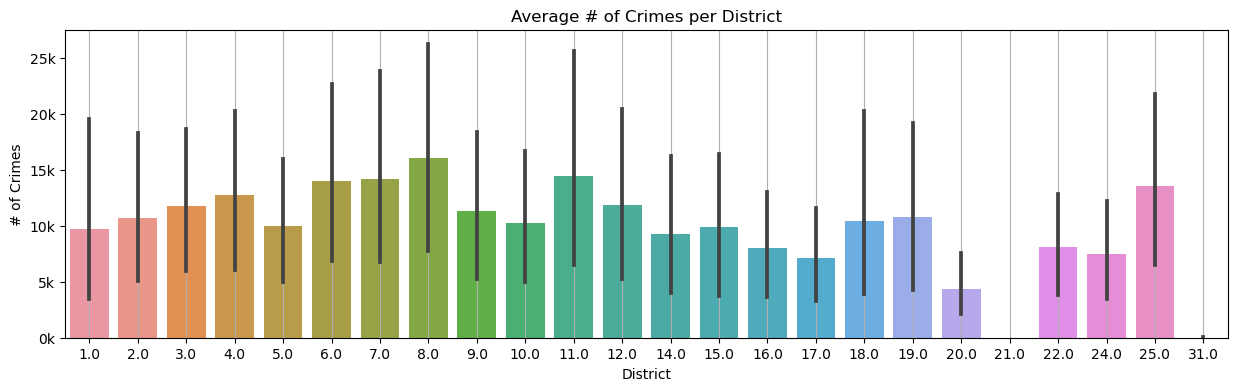

In [62]:
#Using a Bar plot to get average # of crimes per district
fig, ax = plt.subplots()
sns.barplot(plot_df, x='District', y='# of Crimes')
#Setting y-axis format to K's
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
#Putting y axis grid
plt.grid(True, axis='y', linestyle='--', alpha=1.0)  # Add a grid on the y-axis
ax.set_title("Average # of Crimes per District")
ax.grid();

# Comparing Months

## What months have the most crime? What months have the least?
    Most: July - 740,745 crimes
    Least: February - 547,689 crimes


In [51]:
# Set the datetime column as the index
#Setting format so date isnt interpreted as minutes
fmt = "%m/%d/%Y %I:%M:%S %p"
df["datetime"] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S %p', errors='coerce')
# Set the date column as the index
df = df.set_index("datetime")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
datetime,,,,,,,,,,,,,,,,,,,,,
2018-09-01 12:01:00,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2016-05-01 12:25:00,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2017-01-01 12:01:00,11243268,JB167760,01/01/2017 12:01:00 AM,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN
2001-12-15 02:00:00,1896258,G749215,12/15/2001 02:00:00 AM,011XX N STATE ST,0460,BATTERY,SIMPLE,STREET,False,False,...,NaN,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2015-02-02 10:00:00,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [52]:
#Dropping columns we dont need
drop_cols = ["Date", "ID", "Case Number", "Block", "Description", 
             "Location Description", "Arrest", "Domestic",
             "Beat", "Ward", "Community Area", "FBI Code", "X Coordinate",
            "Y Coordinate", "Updated On", "Latitude", "Longitude", "Location", "IUCR", "Year", "District"]
df_months = df.drop(columns=drop_cols).copy()
df_months

,Primary Type
datetime,
2018-09-01 12:01:00,THEFT
2016-05-01 12:25:00,DECEPTIVE PRACTICE
2017-01-01 12:01:00,SEX OFFENSE
2001-12-15 02:00:00,BATTERY
2015-02-02 10:00:00,DECEPTIVE PRACTICE
...,...
2023-06-21 08:00:00,CRIMINAL DAMAGE
2023-05-13 12:00:00,DECEPTIVE PRACTICE
2023-06-24 01:29:00,CRIMINAL TRESPASS


In [53]:
#Grouping by month
df_months["Month"] = df.index.month
df_months["Month"]

datetime
2018-09-01 12:01:00     9
2016-05-01 12:25:00     5
2017-01-01 12:01:00     1
2001-12-15 02:00:00    12
2015-02-02 10:00:00     2
                       ..
2023-06-21 08:00:00     6
2023-05-13 12:00:00     5
2023-06-24 01:29:00     6
2023-06-20 04:00:00     6
2023-06-28 06:00:00     6
Name: Month, Length: 7883251, dtype: int64

In [54]:
#Looking at months d
df_months

,Primary Type,Month
datetime,,
2018-09-01 12:01:00,THEFT,9
2016-05-01 12:25:00,DECEPTIVE PRACTICE,5
2017-01-01 12:01:00,SEX OFFENSE,1
2001-12-15 02:00:00,BATTERY,12
2015-02-02 10:00:00,DECEPTIVE PRACTICE,2
...,...,...
2023-06-21 08:00:00,CRIMINAL DAMAGE,6
2023-05-13 12:00:00,DECEPTIVE PRACTICE,5
2023-06-24 01:29:00,CRIMINAL TRESPASS,6


In [55]:
#Get # of crimes by Hour
crimes_by_month = df_months.groupby('Primary Type')['Month'].value_counts().sort_index()
crimes_by_month

Primary Type       Month
ARSON              1          963
                   2          841
                   3         1140
                   4         1133
                   5         1284
                            ...  
WEAPONS VIOLATION  8        10647
                   9         9435
                   10        9190
                   11        7952
                   12        7401
Name: Month, Length: 415, dtype: int64

In [56]:
## convert to dataframe and reset_index()
df_crime_months= crimes_by_month.to_frame('# of Crimes').reset_index()
df_crime_months


,Primary Type,Month,# of Crimes
0,ARSON,1,963
1,ARSON,2,841
2,ARSON,3,1140
3,ARSON,4,1133
4,ARSON,5,1284
...,...,...,...
410,WEAPONS VIOLATION,8,10647
411,WEAPONS VIOLATION,9,9435
412,WEAPONS VIOLATION,10,9190
413,WEAPONS VIOLATION,11,7952


In [57]:
#Finding # of crimes per month
all_crimes = df_crime_months.groupby("Month")["# of Crimes"].sum().sort_index()
all_crimes 

Month
1     622219
2     547696
3     650265
4     647747
5     704931
6     704091
7     740797
8     732215
9     668255
10    676288
11    608968
12    579779
Name: # of Crimes, dtype: int64

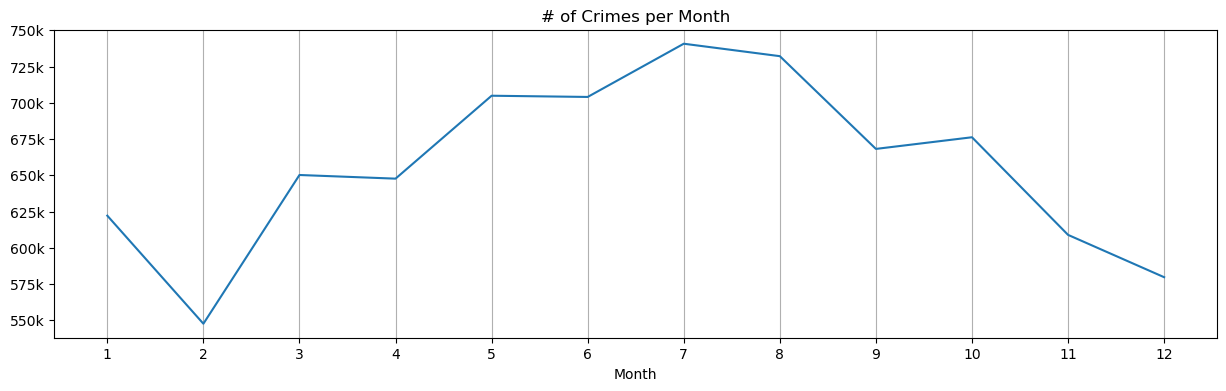

In [63]:
#plotting number of crimes per month
fig, ax = plt.subplots()
all_crimes.plot()
#Setting y-axis format to K's
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
#Putting y axis grid
plt.grid(True, axis='y', linestyle='--', alpha=1.0)  # Add a grid on the y-axis
ax.set_xticks(all_crimes.index)
ax.set_title("# of Crimes per Month")
ax.grid();

## Q5) Are there any individual crimes that do not follow this pattern? If so, which crimes?

Human Trafficking and Non-criminal is **lower** in July, opposite of the Chicago trend.


In [59]:
#Setting the timeseries to Monthly
#using .size to get the count of each month
ts = df_months.resample("M").size()
ts.head()

datetime
2001-01-31    38119
2001-02-28    33787
2001-03-31    40566
2001-04-30    40091
2001-05-31    41839
Freq: M, dtype: int64

In [60]:
df_crime_months

,Primary Type,Month,# of Crimes
0,ARSON,1,963
1,ARSON,2,841
2,ARSON,3,1140
3,ARSON,4,1133
4,ARSON,5,1284
...,...,...,...
410,WEAPONS VIOLATION,8,10647
411,WEAPONS VIOLATION,9,9435
412,WEAPONS VIOLATION,10,9190
413,WEAPONS VIOLATION,11,7952


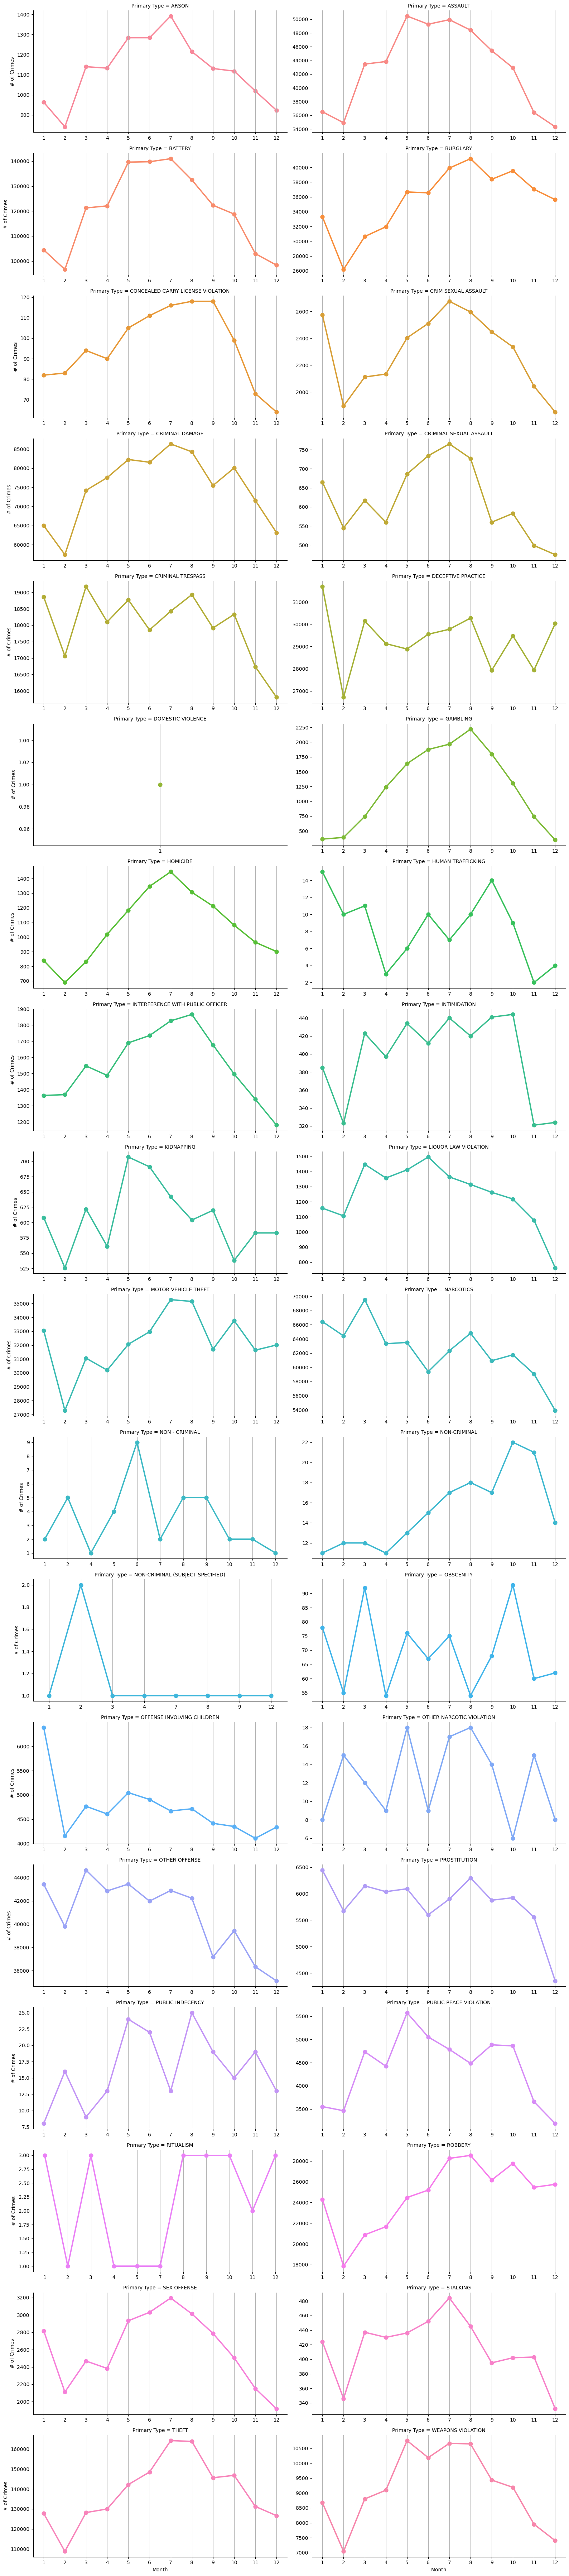

In [61]:
g = sns.catplot(df_crime_months, x='Month', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];
